# Análisis Descriptivo de la Gestión del negocio: Influenciadores clave

Un análisis descriptivo es un tipo de análisis que se utiliza para explorar y describir los datos, identificar patrones y tendencias y para generar estadísticas y visualizaciones que permitan entender los datos de manera más clara. En este caso, se utilizan las técnicas de correlación y pruebas estadísticas para identificar las variables que influyen en las ventas de la empresa ***AdventureWorks***.

Un análisis descriptivo no pretende hacer predicciones o recomendaciones, sino simplemente brindar una descripción más detallada de los datos y su relación entre ellos.

## Carga de las librerías de python necesarias

In [49]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]

Las librerías de Python son conjuntos de código predefinido que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

## Extracción de los datos desde SQL Server

In [50]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=T04W01;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
input_query = '''select
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	 sum(t1.TotalDue) as 'ventas',
	 sum(t2.OrderQty) as 'cantidad',
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 count(distinct t2.ProductID) as 'variedad',
	 count(distinct t1.CustomerID) as 'clientes',
	 CASE 
		WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		end as 'vendedores'
from Sales.SalesOrderHeader as t1
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''

sales_data = pd.read_sql(input_query, conn_str)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_21424\427442239.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(input_query, conn_str)


### - Explicar linea por linea la query utilizada arriba

* CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha':
> Crea una cadena con el formato "AÑO-MES" de la fecha de pedido.

* sum(t1.TotalDue) as 'ventas':
> Suma el total debido de todos los pedidos en cada grupo.

* sum(t2.OrderQty) as 'cantidad':
> Suma la cantidad de artículos pedidos en cada grupo.

* count(distinct t1.SalesOrderID) as 'transacciones':
> Cuenta el número único de pedidos en cada grupo.

* sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio':
> Calcula el monto promedio por transacción.

* sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio':
> Calcula la cantidad promedio de artículos por transacción.

* count(distinct t2.ProductID) as 'variedad':
> Cuenta el número único de productos vendidos en cada grupo.

* count(distinct t1.CustomerID) as 'clientes':
> Cuenta el número único de clientes en cada grupo.

* CASE WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID) end as 'vendedores':
> Cuenta el número único de vendedores, pero si no hay vendedores, devuelve 1.

* from Sales.SalesOrderHeader as t1 Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID:
> Une las tablas de encabezado y detalle de pedidos de ventas.

* group by YEAR(t1.OrderDate), MONTH(t1.OrderDate):
> Agrupa los resultados por año y mes de la fecha de pedido.

* order by YEAR(t1.OrderDate), MONTH(t1.OrderDate):
> Ordena los resultados cronológicamente por año y mes.



In [51]:
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


### - Explicar tabla de arriba, por ejemplo: ¿Que significa cada columna?

Esta consulta proporciona un resumen mensual de las ventas, incluyendo métricas como ventas totales, cantidad de artículos vendidos, número de transacciones, promedios por transacción, variedad de productos, número de clientes y número de vendedores.


### - Aproximar a dos decimales el monto_promedio

In [52]:
sales_data['monto_promedio']= sales_data['monto_promedio'].round(2)
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.66,6,58,219,10


### - Efectuar la misma conexión a la base de datos usando SQLAlchemy, usar también la misma query.

In [53]:
import pyodbc
import sqlalchemy as sal
from sqlalchemy import create_engine, inspect
import pandas as pd

In [54]:
engine = create_engine('mssql+pyodbc://T04W01/AdventureWorks2019?driver=SQL+Server&Trusted_Connection=yes')

In [55]:
input_query = '''select
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	 sum(t1.TotalDue) as 'ventas',
	 sum(t2.OrderQty) as 'cantidad',
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 count(distinct t2.ProductID) as 'variedad',
	 count(distinct t1.CustomerID) as 'clientes',
	 CASE 
		WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		end as 'vendedores'
from Sales.SalesOrderHeader as t1
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''

sales_sqlalchemy = pd.read_sql(input_query, conn_str)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_21424\415732566.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_sqlalchemy = pd.read_sql(input_query, conn_str)


In [56]:
sales_sqlalchemy

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


## Exploración del dataset extraído

### - Muestre la información general del dataframe

In [57]:
sales_sqlalchemy.info()
#No tiene nulos, fecha está como object y no como datetime, y las demas variables como int o float. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              38 non-null     object 
 1   ventas             38 non-null     float64
 2   cantidad           38 non-null     int64  
 3   transacciones      38 non-null     int64  
 4   monto_promedio     38 non-null     float64
 5   cantidad_promedio  38 non-null     int64  
 6   variedad           38 non-null     int64  
 7   clientes           38 non-null     int64  
 8   vendedores         38 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.8+ KB


### - Muestre los tipos de datos de cada columna:

In [58]:
sales_sqlalchemy.columns

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')

### - Dimensiones del dataframe (shape)

In [59]:
sales_sqlalchemy.shape

(38, 9)

### - Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [60]:
sales_sqlalchemy.describe()

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
count,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7.702553e+07,7234.578947,828.026316,147862.879674,11.342105,101.631579,808.842105,11.236842
std,6.051102e+07,5601.450467,796.913149,124012.409608,7.826760,51.404817,769.105536,5.074761
min,1.461499e+05,141.000000,43.000000,155.644100,1.000000,21.000000,43.000000,1.000000
25%,2.606614e+07,2974.000000,287.000000,49202.019475,5.250000,58.250000,287.000000,10.000000
50%,7.756321e+07,5609.000000,384.000000,111793.302500,9.500000,99.500000,384.000000,12.500000
75%,1.215372e+08,10851.750000,1752.000000,259254.022025,17.750000,145.000000,1703.500000,15.750000
max,2.150542e+08,22582.000000,2411.000000,432681.923300,28.000000,196.000000,2350.000000,17.000000


### - Aproxime los resultados anteriores a dos decimales aquellas columnas que lo requieran

In [61]:
sales_sqlalchemy['monto_promedio'] =  sales_sqlalchemy['monto_promedio'].round(2)
sales_sqlalchemy


,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.66,6,58,219,10


### - Imprimir en un objeto tipo Index todas las columnas del dataframe

In [62]:
sales_sqlalchemy.columns

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')

### - Muestre el contenido de las primeras 15 líneas del dataframe

In [63]:
sales_sqlalchemy.head(15)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.66,6,58,219,10


### - Muestre las últimas cinco líneas del dataframe

In [64]:
sales_sqlalchemy.tail(15)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
23,2013-4,8.188507e+07,6449,428,191320.27,15,99,428,14
24,2013-5,1.282748e+08,10260,428,299707.41,23,196,426,15
25,2013-6,1.962551e+08,16611,719,272955.63,23,194,713,16
26,2013-7,1.925832e+08,18589,1740,110680.02,10,187,1675,17
27,2013-8,9.361898e+07,11548,1789,52330.34,6,167,1727,16
28,2013-9,1.340201e+08,14576,1791,74829.77,8,173,1741,17
29,2013-10,1.370603e+08,14984,1968,69644.47,7,169,1893,16
30,2013-11,5.434172e+07,9667,2103,25840.10,4,145,2041,17
31,2013-12,7.954001e+07,11049,2050,38800.00,5,148,1970,16
32,2014-1,8.022601e+07,11463,2141,37471.28,5,145,2073,16


### Calcular el cambio procentual (o incremento porcentual) de las ventas mes a mes. Recordar el ejemplo realizado en clase con las acciones de las 'Big Four' del 2010.

In [65]:
# Convertir la columna 'fecha' a datetime
sales_sqlalchemy['fecha'] = pd.to_datetime(sales_sqlalchemy['fecha'])

# Ordenar el DataFrame por fecha
sales_sqlalchemy = sales_sqlalchemy.sort_values(by='fecha')

# 1. Calcular el cambio porcentual de las ventas mes a mes
sales_sqlalchemy['pct_change_ventas'] = (sales_sqlalchemy['ventas'].pct_change() * 100).round(2)

sales_sqlalchemy

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,pct_change_ventas
0,2011-05-01,8.094970e+06,825,43,188255.12,19,47,43,9,NaN
1,2011-06-01,5.070965e+05,141,141,3596.43,1,21,141,1,-93.74
2,2011-07-01,2.608142e+07,2209,231,112906.58,9,51,231,10,5043.29
3,2011-08-01,3.800996e+07,2904,250,152039.84,11,59,250,10,45.74
4,2011-09-01,5.547916e+05,157,157,3533.70,1,22,157,1,-98.54
5,2011-10-01,8.573987e+07,5382,327,262201.45,16,60,327,10,15354.43
6,2011-11-01,8.153130e+05,230,230,3544.84,1,23,230,1,-99.05
7,2011-12-01,1.098031e+07,1040,228,48159.25,4,51,228,9,1246.76
8,2012-01-01,5.743832e+07,3967,336,170947.40,11,51,336,10,423.10
9,2012-02-01,1.792551e+07,1442,219,81851.66,6,58,219,10,-68.79


In [66]:
print("Cambio porcentual de las ventas mes a mes:")
print(sales_sqlalchemy[['ventas', 'pct_change_ventas']])

Cambio porcentual de las ventas mes a mes:
          ventas  pct_change_ventas
0   8.094970e+06                NaN
1   5.070965e+05             -93.74
2   2.608142e+07            5043.29
3   3.800996e+07              45.74
4   5.547916e+05             -98.54
5   8.573987e+07           15354.43
6   8.153130e+05             -99.05
7   1.098031e+07            1246.76
8   5.743832e+07             423.10
9   1.792551e+07             -68.79
10  4.927356e+07             174.88
11  2.606104e+07             -47.11
12  1.192323e+08             357.51
13  1.687460e+08              41.53
14  1.414237e+08             -16.19
15  7.558641e+07             -46.55
16  1.223055e+08              61.81
17  8.901987e+07             -27.22
18  3.977622e+07             -55.32
19  6.598887e+07              65.90
20  4.571396e+07             -30.72
21  8.138381e+07              78.03
22  1.182912e+08              45.35
23  8.188507e+07             -30.78
24  1.282748e+08              56.65
25  1.962551e+08     

### - Calcular el promedio de ventas de por trimestre y por año.

In [67]:
# Promedio trimestral
sales_sqlalchemy.set_index('fecha', inplace=True)
quarterly_sales = sales_sqlalchemy['ventas'].resample('Q').mean()

print("\nPromedio de ventas por trimestre:")
print(quarterly_sales)


Promedio de ventas por trimestre:
fecha
2011-06-30    4.301033e+06
2011-09-30    2.154872e+07
2011-12-31    3.251183e+07
2012-03-31    4.154580e+07
2012-06-30    1.046798e+08
2012-09-30    1.131052e+08
2012-12-31    6.492832e+07
2013-03-31    8.179632e+07
2013-06-30    1.354716e+08
2013-09-30    1.400741e+08
2013-12-31    9.031402e+07
2014-03-31    9.979151e+07
2014-06-30    4.702207e+07
Freq: QE-DEC, Name: ventas, dtype: float64


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_21424\1023593006.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = sales_sqlalchemy['ventas'].resample('Q').mean()


In [68]:
annual_sales = sales_sqlalchemy['ventas'].resample('Y').mean()

print("\nPromedio de ventas por año:")
print(annual_sales)


Promedio de ventas por año:
fecha
2011-12-31    2.134797e+07
2012-12-31    8.106478e+07
2013-12-31    1.119140e+08
2014-12-31    7.340679e+07
Freq: YE-DEC, Name: ventas, dtype: float64


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_21424\2700311489.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_sales = sales_sqlalchemy['ventas'].resample('Y').mean()


## Procesamiento de los datos: Cálculo de la correlación entre las variables

### - Seleccionar solo columnas numéricas del dataframe:

In [69]:
sales_sqlalchemy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2011-05-01 to 2014-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ventas             38 non-null     float64
 1   cantidad           38 non-null     int64  
 2   transacciones      38 non-null     int64  
 3   monto_promedio     38 non-null     float64
 4   cantidad_promedio  38 non-null     int64  
 5   variedad           38 non-null     int64  
 6   clientes           38 non-null     int64  
 7   vendedores         38 non-null     int64  
 8   pct_change_ventas  37 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 3.0 KB


In [70]:
sales_sqlalchemy.columns

Index(['ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores',
       'pct_change_ventas'],
      dtype='object')

In [71]:
df_numericas = sales_sqlalchemy.copy()

### - Imprima la nueva dataset con las columnas numéricas

In [72]:
df_numericas

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,pct_change_ventas
fecha,,,,,,,,,
2011-05-01,8.094970e+06,825,43,188255.12,19,47,43,9,NaN
2011-06-01,5.070965e+05,141,141,3596.43,1,21,141,1,-93.74
2011-07-01,2.608142e+07,2209,231,112906.58,9,51,231,10,5043.29
2011-08-01,3.800996e+07,2904,250,152039.84,11,59,250,10,45.74
2011-09-01,5.547916e+05,157,157,3533.70,1,22,157,1,-98.54
2011-10-01,8.573987e+07,5382,327,262201.45,16,60,327,10,15354.43
2011-11-01,8.153130e+05,230,230,3544.84,1,23,230,1,-99.05
2011-12-01,1.098031e+07,1040,228,48159.25,4,51,228,9,1246.76
2012-01-01,5.743832e+07,3967,336,170947.40,11,51,336,10,423.10


### - Calcular la correlación, imprima la matriz de correlación.

In [73]:
correlation = df_numericas.corr()
correlation

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,pct_change_ventas
ventas,1.000000,0.905770,0.340578,0.518040,0.560443,0.786085,0.343143,0.756155,0.110653
cantidad,0.905770,1.000000,0.695079,0.150793,0.220271,0.911487,0.696895,0.741270,0.064154
transacciones,0.340578,0.695079,1.000000,-0.471896,-0.419235,0.691916,0.999950,0.344915,-0.011070
monto_promedio,0.518040,0.150793,-0.471896,1.000000,0.980627,0.135919,-0.469092,0.351248,0.098170
cantidad_promedio,0.560443,0.220271,-0.419235,0.980627,1.000000,0.227174,-0.416486,0.421830,0.059987
variedad,0.786085,0.911487,0.691916,0.135919,0.227174,1.000000,0.693319,0.749922,-0.091746
clientes,0.343143,0.696895,0.999950,-0.469092,-0.416486,0.693319,1.000000,0.346082,-0.009347
vendedores,0.756155,0.741270,0.344915,0.351248,0.421830,0.749922,0.346082,1.000000,0.033470
pct_change_ventas,0.110653,0.064154,-0.011070,0.098170,0.059987,-0.091746,-0.009347,0.033470,1.000000


### Graficar la matriz de correlación siguiendo el estilo de un mapa de calor:

### - Explicar línea por línea el siguiente código:

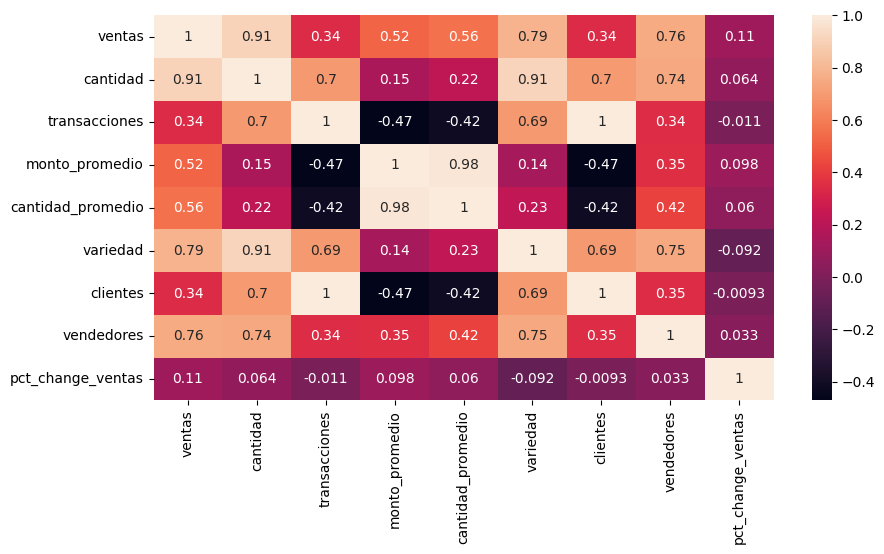

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(df_numericas[correlation.index].corr(), annot=True)
plt.show()

### - Describa y explique la salida (la matriz de correlación) anterior

Variables con correlación positiva, mayor a 0.90: 
* cantidad - ventas = 0.91
* variedad - cantidad = 0.91
* cantidad_promedio - monto_promedio = 0.98 (altísima)

Variables con correlación entre >0.5 y <0.90: 
* transacciones - cantidad = 0.7 
* variedad -transacciones = 0.69
* variedad - ventas = 0.79
* vendedores - ventas = 0.76
* vendedores -cantidad = 0.74
* vendedores - variedad = 0.75
* clientes - variedad = 0.69


### Selección de las variables más correlacionadas con las ventas

In [75]:
df_numericas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2011-05-01 to 2014-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ventas             38 non-null     float64
 1   cantidad           38 non-null     int64  
 2   transacciones      38 non-null     int64  
 3   monto_promedio     38 non-null     float64
 4   cantidad_promedio  38 non-null     int64  
 5   variedad           38 non-null     int64  
 6   clientes           38 non-null     int64  
 7   vendedores         38 non-null     int64  
 8   pct_change_ventas  37 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 3.0 KB


In [76]:
correlation = correlation["ventas"].sort_values(ascending=False)

### Explicar el código dado arriba

Calcula las variables que más se correlacionan con ventas y las ordena en orden ascendente ( de mayor a menor)

### - Visualización gráfica de las variables correlacionadas

### - Explicar linea por línea el siguiente código:

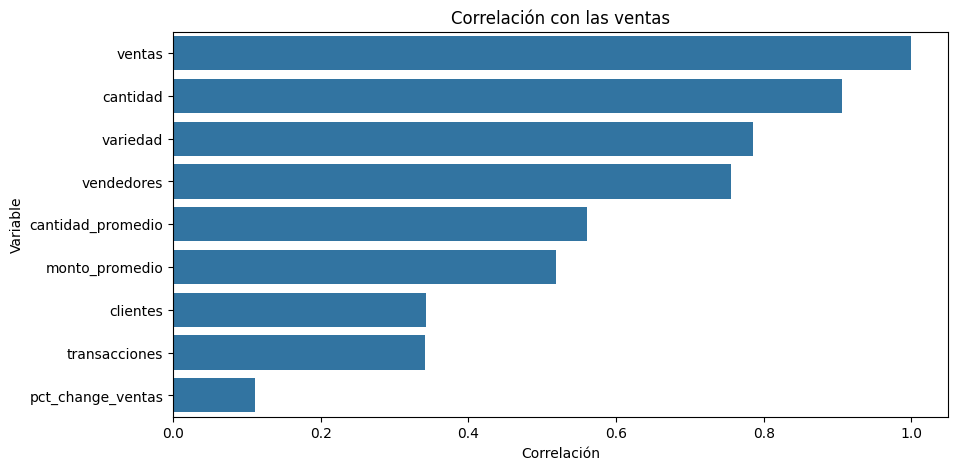

In [77]:
plt.figure(figsize=(10,5)) #tamaño de la figura 
sns.barplot(x=correlation.values, y=correlation.index) #Grafico bar plot 
plt.title("Correlación con las ventas")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

### - Interpretar el plot de arriba

Obviamente la variable ventas es la mas alta, luego está cantidad correlacionada con ventas  y variedad. La que menos se correlaciona es la variale transacciones. 

### - Seleccionar las variables mas correlacionadas,  esta vez con monto_promedio

In [78]:

correlation_matrix = df_numericas.corr()


correlation_monto_promedio = correlation_matrix["monto_promedio"].sort_values(ascending=False)

### - Visualización gráfica de las variables correlacionadas con monto_promedio

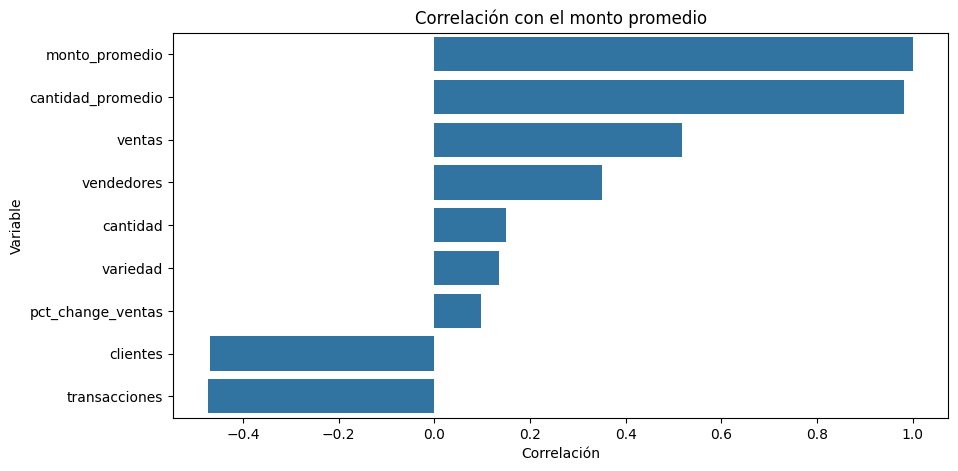

In [79]:
plt.figure(figsize=(10, 5))  # Tamaño de la figura
sns.barplot(x=correlation_monto_promedio.values, y=correlation_monto_promedio.index)  # Gráfico de barras
plt.title("Correlación con el monto promedio")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

## Pruebas formales para determinar la influencia de cada variable en las ventas

Las pruebas formales se refieren a un conjunto de técnicas estadísticas y matemáticas que se utilizan para validar las hipótesis y afirmaciones hechas sobre los datos en un estudio o análisis.

Asimismo, las pruebas formales son una parte importante del análisis de datos ya que permiten tomar decisiones basadas en evidencia sólida en lugar de basarse únicamente en la intuición o el juicio subjetivo. 

Estas pruebas ayudan a los investigadores a determinar si los patrones o relaciones observados en los datos son estadísticamente significativos o simplemente el resultado del azar.

### - Explicar línea por línea el siguiente código:

In [80]:
df_numericas.columns

Index(['ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores',
       'pct_change_ventas'],
      dtype='object')

In [81]:
df_numericas = df_numericas.drop(columns=['pct_change_ventas'])
df_numericas.columns

Index(['ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')

In [85]:
df_numericas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2011-05-01 to 2014-06-01
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ventas             38 non-null     float64
 1   cantidad           38 non-null     int64  
 2   transacciones      38 non-null     int64  
 3   monto_promedio     38 non-null     float64
 4   cantidad_promedio  38 non-null     int64  
 5   variedad           38 non-null     int64  
 6   clientes           38 non-null     int64  
 7   vendedores         38 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 2.7 KB


In [87]:
correlation = df_numericas.corr()
correlation

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
ventas,1.000000,0.905770,0.340578,0.518040,0.560443,0.786085,0.343143,0.756155
cantidad,0.905770,1.000000,0.695079,0.150793,0.220271,0.911487,0.696895,0.741270
transacciones,0.340578,0.695079,1.000000,-0.471896,-0.419235,0.691916,0.999950,0.344915
monto_promedio,0.518040,0.150793,-0.471896,1.000000,0.980627,0.135919,-0.469092,0.351248
cantidad_promedio,0.560443,0.220271,-0.419235,0.980627,1.000000,0.227174,-0.416486,0.421830
variedad,0.786085,0.911487,0.691916,0.135919,0.227174,1.000000,0.693319,0.749922
clientes,0.343143,0.696895,0.999950,-0.469092,-0.416486,0.693319,1.000000,0.346082
vendedores,0.756155,0.741270,0.344915,0.351248,0.421830,0.749922,0.346082,1.000000


In [88]:
influencers = []
for variable in correlation.index:
    p_value, corr = stats.pearsonr(df_numericas["ventas"], df_numericas[variable])
    if p_value <= 0.05:
        influencers.append((variable, corr))
    elif p_value > 0.05:
        influencers.append((variable, corr, "No significativo"))

### - Utlizar código de arriba pero tomando como referencia la varible monto_promedio

In [92]:
influencers_m = []
for variable in correlation.index:
    p_value, corr = stats.pearsonr(df_numericas["monto_promedio"], df_numericas[variable])
    if p_value <= 0.05:
        influencers_m.append((variable, corr))
    elif p_value > 0.05:
        influencers_m.append((variable, corr, "No significativo"))

### Impresión de los resultados

### - Explicar línea por línea el siguiente código:  

In [94]:
print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers:
    if len(influencers) > 2:
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}")

Variables influyentes en las ventas:
ventas: correlación = 0.00 (No significativo)
cantidad: correlación = 0.37 (No significativo)


ValueError: not enough values to unpack (expected 3, got 2)

Se agregó una comprobación de la hipótesis nula antes de imprimir los resultados de la prueba de correlación. La hipótesis nula establece que no existe una correlación entre las variables, y se rechaza si el **valor p es menor que 0,05**. 

### - Rehacer el código de arriba pero usando monto_promedio

In [96]:
print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers_m:
    if len(influencers_m) > 3:
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}")


Variables influyentes en las ventas:
ventas: correlación = 0.00 (No significativo)
cantidad: correlación = 0.37 (No significativo)


ValueError: not enough values to unpack (expected 3, got 2)

## Conclusiones

Ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa. En otras palabras, el análisis indica que no hay una relación clara entre las variables y las ventas de la empresa. 

Es importante tener en cuenta que la falta de correlación no necesariamente significa que las variables no son importantes para el negocio, ya que pueden haber otros factores que afecten las ventas que no se están considerando en este análisis. 

Por lo tanto, es necesario realizar más análisis y considerar otros factores para comprender mejor las tendencias de las ventas de la empresa.

## Recomendaciones

A partir de los resultados y las conclusiones de que ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa, se pueden dar las siguientes recomendaciones:

* *Ampliar el análisis*: Es importante considerar que el análisis realizado solo incluyó un conjunto limitado de variables y no consideró otros factores importantes que podrían estar influyendo en las ventas de la empresa. Se recomienda realizar un análisis más amplio e incluir otras variables relevantes que puedan tener un impacto en las ventas, como la satisfacción del cliente, la calidad de los productos, la competencia en el mercado, entre otros.

* *Realizar encuestas a los clientes*: Realizar encuestas a los clientes puede ser una buena manera de obtener información sobre los factores que los motivan a comprar y los aspectos que consideran importantes al momento de realizar una compra. Esta información puede ayudar a la empresa a identificar áreas de oportunidad y mejorar su estrategia de ventas.

* *Realizar análisis de la competencia*: Analizar a la competencia puede ser útil para entender mejor el mercado y conocer las tendencias del mismo. Además, puede ayudar a la empresa a identificar estrategias exitosas de la competencia que puedan ser aplicables a su negocio.

* *Implementar estrategias de marketing*: Aunque las variables analizadas no mostraron una correlación significativa con las ventas, implementar estrategias de marketing puede ser útil para incrementar la exposición de la empresa y atraer a nuevos clientes. Las estrategias de marketing pueden incluir publicidad en línea, redes sociales, promociones y descuentos, entre otros.